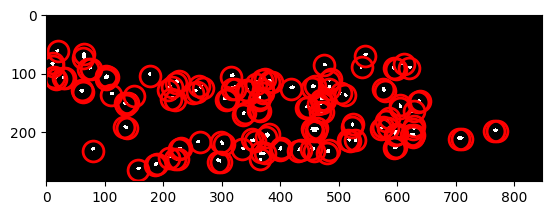

<Axes: >

In [150]:
import imageio
import numpy as np
import trackpy as tp
import pims
import os
import cv2
import matplotlib.pyplot as plt
import av

def convert_to_black_and_white(image_path, threshold=120):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binary_image

input_dir = '/Users/anuraagaravindan/Desktop/image_Processing-nonGit/Tracking'
output_dir = '/Users/anuraagaravindan/Desktop/image_Processing-nonGit/Tracking'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Get a list of .png files in the input directory
image_files = [f for f in os.listdir(input_dir) if f.lower().endswith('.png')]

# Convert each image to black and white and save in the output directory
frames = []
for filename in image_files:
    file_path = os.path.join(input_dir, filename)
    bw_image = convert_to_black_and_white(file_path)
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, bw_image)
    frames.append(pims.Frame(bw_image))

# Now, you can process these frames with trackpy
f = tp.locate(frames[0], 3, invert=True)
tp.annotate(f, frames[0])



In [156]:

f = tp.batch(frames, 3, invert=True)
t = tp.link(f, 25, memory=3) 

pairs = None

part_1 = t[t['frame'] == 0].copy()
part_2 = t[t['frame'] == 1].copy()

shared_particles = set(part_1['particle']).intersection(set(part_2['particle']))

print("Number of shared particles:", len(shared_particles))

part_1_shared = part_1[part_1['particle'].isin(shared_particles)]
part_2_shared = part_2[part_2['particle'].isin(shared_particles)]

print("Entries in part_1_shared:", len(part_1_shared))
print("Entries in part_2_shared:", len(part_2_shared))

part_1_shared.set_index('particle', inplace=True)
part_2_shared.set_index('particle', inplace=True)
part_1_shared = part_1_shared.sort_values(by='particle', ascending=True)
part_2_shared = part_2_shared.sort_values(by='particle', ascending=True)
part_1_shared, part_2_shared = part_1_shared.align(part_2_shared, join='inner', axis=1)
part_1_shared = part_1_shared[['y', 'x']]
part_2_shared = part_2_shared[['y', 'x']]





Frame 1: 102 trajectories present.
Number of shared particles: 53
Entries in part_1_shared: 53
Entries in part_2_shared: 53


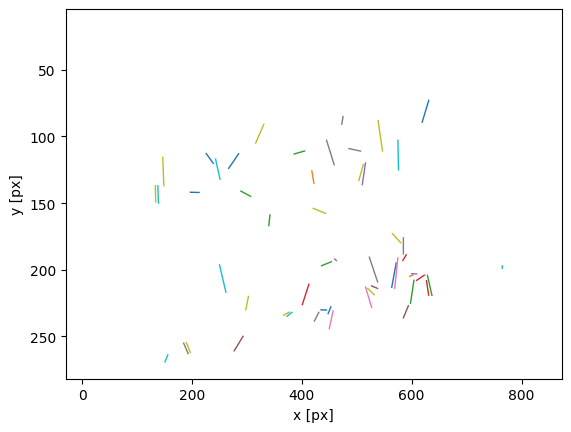

<Axes: xlabel='x [px]', ylabel='y [px]'>

In [157]:
tp.plot_traj(t)

In [158]:
print(len(part_1))
print(len(part_2))

141
102


In [159]:
displacements = part_2_shared[['y', 'x']] - part_1_shared[['y', 'x']] 
results = part_1_shared.join(displacements, rsuffix='_displacement')

print(len(results))
results

53


,y,x,y_displacement,x_displacement
particle,,,,
1,204.837766,596.303191,-0.774501,5.780482
2,204.193627,628.737745,14.920658,8.189874
3,204.032520,623.040650,3.916999,-14.043054
4,202.997275,599.948229,0.053206,9.049367
9,197.112705,765.104508,1.779939,-0.156198
10,194.928241,571.773148,18.260299,-8.026383
12,193.988558,453.899314,2.942404,-17.899314
13,193.013333,584.006667,-4.183597,6.000528
14,193.086854,462.948357,-1.159512,-3.059255


In [161]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


output_folder = '/Users/anuraagaravindan/Desktop/image_Processing-nonGit/Validation'
os.makedirs(output_folder, exist_ok=True)
img_path_und = '/Users/anuraagaravindan/Desktop/image_Processing-nonGit/Tracking/1_Undeformed_Prediction_new.png'
image_und = Image.open(img_path_und)
image_array_und = np.array(image_und)

img_path_def = '/Users/anuraagaravindan/Desktop/image_Processing-nonGit/Tracking/2_Deformed_Prediction_new.png'
image_def = Image.open(img_path_def)
image_array_def = np.array(image_def)

part_1_shared['new_x'] = part_1_shared['x'] + results['x_displacement']
part_1_shared['new_y'] = part_1_shared['y'] + results['y_displacement']

fig, ax = plt.subplots(figsize=(10, 4)) 
ax.imshow(image_array_und, cmap='gray')
ax.scatter(part_1_shared['x'], part_1_shared['y'], color='red', s=20)
ax.set_title('Original Positions')
plt.savefig(os.path.join(output_folder, 'Original_Positions.png'))
plt.close(fig)

fig, ax = plt.subplots(figsize=(10, 4))
ax.imshow(image_array_def, cmap='gray')  # Blank canvas
ax.scatter(part_1_shared['new_x'], part_1_shared['new_y'], color='green', s=20)
ax.set_title('New Positions After Displacement')
plt.savefig(os.path.join(output_folder, 'New_Positions.png'))
plt.close(fig)

fig, ax = plt.subplots(figsize=(10, 4))
ax.imshow(image_array_def, cmap='gray')
ax.scatter(part_2_shared['x'], part_2_shared['y'], color='green', s=20)
ax.set_title('Validation Deformed')
plt.savefig(os.path.join(output_folder, 'Validation_Deformed.png'))
plt.close(fig)

plt.show()
